In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model

IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Datasets/train'
valid_path = '/content/drive/MyDrive/Datasets/test'

vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
    layer.trainable = False

folders = glob('/content/drive/MyDrive/Datasets/train/*')

x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

#  model object
model = Model(inputs=vgg.input, outputs=prediction)

#view the structure of the model
model.summary()

80150528/80134624 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
163/163 [==============================] - 3687s 22s/step - loss: 0.4091 - accuracy: 0.8454 - val_loss: 0.2561 - val_accuracy: 0.9071
Epoch 2/5
163/163 [==============================] - 3627s 22s/step - loss: 0.1347 - accuracy: 0.9498 - val_loss: 0.2531 - val_accuracy: 0.9167
Epoch 3/5
163/163 [==============================] - 3681s 23s/step - loss: 0.1008 - accuracy: 0.9560 - val_loss: 0.4885 - val_accuracy: 0.8494
Epoch 4/5
163/163 [==============================] - 3671s 23s/step - loss: 0.1001 - accuracy: 0.9624 - val_loss: 0.3907 - val_accuracy: 0.8894
Epoch 5/5
163/163 [==============================] - 3722s 23s/step - loss: 0.1247 - accuracy: 0.9554 - val_loss: 0.3077 - val_accuracy: 0.9167


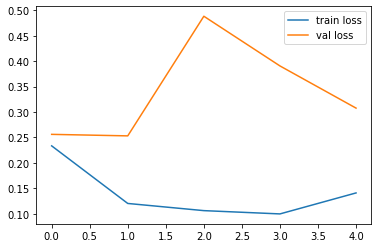

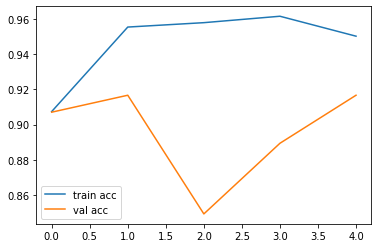

<Figure size 432x288 with 0 Axes>

In [3]:
# cost and optimization method 
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

# fit the model

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Datasets/vgg19LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Datasets/vgg19AccVal_acc')

import tensorflow as tf

from keras.models import load_model
model.save("/content/drive/MyDrive/Datasets/medvgg19.h5")

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
import numpy as np
model = load_model('/content/drive/MyDrive/Datasets/medvgg19.h5')
img = image.load_img('/content/drive/MyDrive/Datasets/test/PNEUMONIA/person1_virus_6.jpeg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
class_ = model.predict(img_data)
pred= class_[0][0]

if pred>0.5:
  print("Normal")
else:
  print("Disease")



Disease
